# Final Project 2

## Latar Belakang 


Iklim Australia sangat bervariasi di delapan negara bagian dan wilayahnya; kebanyakan wilayah Australia memiliki empat musim; sementara musim kering dan hujan berlangsung di wilayah tropis di utara benua. 

Musim-musim di Australia berkebalikan dengan musim-musim yang dialami oleh negara-negara di belahan dunia utara. Musim panas berlangsung pada bulan Desember hingga Februari, musim gugur pada bulan Maret hingga Mei, musim dingin pada bulan Juni hingga Agustus, dan musim semi pada bulan September hingga November. Susun rencana lebih awal dengan informasi suhu udara dan curah hujan di kota-kota besar di Australia ini.

Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia.
RainTomorrow adalah variabel target untuk diprediksi. Artinya -- apakah hari berikutnya hujan, Ya atau Tidak? Kolom ini adalah Ya jika curah hujan untuk hari itu adalah 1mm atau lebih. Dataset ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.

## Attribute Information:
***The data From : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package***
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

## Objektif
  Pada Final Project 2 kali ini yang akan di capai adalah :
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi



# B. Import Pustaka
Bagian dan Program kali ini berisi untuk menggunakan library untuk melakukan preprocesing, visualisasi dan library untuk modelling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np 
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

print('dataset sudah siap !!')

dataset sudah siap !!


# C. Data Loading 
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.


## Memasukkan dataset dan menampilkan informasi data

1. Memasukkan Dataset, dataset yang di pakai pada program ini ialah dataset weatherAUS, lalu menampilkan informasi  5 data teratas dan informasi 5 data terbawah.

In [2]:
df = pd.read_csv('dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


2. Menampilkan nama kolom, kolom apa saja yang terdapat di dalam dataset

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

3. Menampilkan informasi tentang kolom, baris dan tipe data yang berada di dalam dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Pada dataset ini memiliki range index atau baris sebanyak 145460 baris dan memiliki 3 jenis tipe data yang banyak di pakai di dalam dataset ini ialah tipe data object dan float64

4. Menampilkan informasi tentang jumlah baris dan kolom yang berada di dalam dataset ini

In [6]:
df.shape

(145460, 23)

pada dataset ini terdapat range index atau baris sebanyak 145460 dan memiliki 15 kolom

5. Menampilkan ukuran data yang nilainya adalah jumlah baris dikali jumlah kolom, pada dataset ini

In [7]:
df.size

3345580

6. Menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe numerik

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# D. Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

1. Pertama kita akan mengecek kembali mengenai informasi yang berada di dalam dataset ini, agar ketika kita melakukan data cleaning, kita akan mudah melakukannya

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

2.  Selanjutnya  mengecek missing value di karnakan terdapat banyak sekali missing value pada data ini, mari kita cek missing value pada dataset ini.

In [10]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

bisa di lihat, terdapat banyak sekali missing value pada dataset ini, maka kita  harus menghilangkan missing value pada dataset ini.

3.  Selanjutnya untuk menghilangkan missing value pada dataset ini, mari kita lakukan normalisasi pada dataset tersebut dengan cara melakukan dropping nilai null pada variabel target terlebih dahulu.

In [11]:
#Dropping the null values in dependent variable
#Use df1 veriable for train data
df = df[df['RainTomorrow'].notna()]   #This is our training data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


Kolom Date didrop dikarenakan tanggal tidak terlalu memengaruhi prediksi dan nilai Date pada dataset ini memiliki nilai yang berbeda untuk setiap barisnya dan tidak memiliki kesamaan dan jika ada kesamaan itu dikarenakan cuaca dicek pada tiap lokasi yang ada di Australia.

In [12]:
df[["Date","Location"]].nunique()

Date        3436
Location      49
dtype: int64

In [13]:
df.drop("Date", axis = 1, inplace = True)

4. Selanjutnya kita akan melakukan pengelompokkan antara categorical data dan numerical data untuk memudahkan ketika mengisi nilai missing value pada kolom

## Categorical  Data

In [14]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
#Display categorical variables
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


## Numerical Data

In [16]:
# find categorical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} categorical variables\n'.format(len(numerical)))

print('The categorical variables are :', numerical)

There are 16 categorical variables

The categorical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


5. Selanjutnya mengisi value yang kosong pada numerik dan categorical kolom 

## Mengisi Value yang Kosong Pada Numerik dan Kategorik Kolom.

Untuk variabel kategorikal diisikan dengan nilai modus. Kolom Lokasi tidak dimasukan dikarenakan tidak memiliki missing value, dan begitu juga dengan RainTomorrow dikarenakan sudah di drop missing valuenya dari awal.

In [18]:
#replacing null values in categorical variables with mode value
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

Untuk variabel numerik diisikan dengan nilai mean

In [19]:
#filling the null values in numerical variable with mean
df = df.fillna(df.mean())
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


6. Mengecek kembali missing value pada dataset

In [20]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

bisa di lihat, missing value telah hilang ketika sudah di lakukannya dropping dan menlakukan categorical data dan numerikal data pada dataset.

# E. Exploratory Data Analysis
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.


## Displot
melakukan visualisasi dengan menggunakan library seaborn dan menggunakan displot sebagai jenis visualisasinya. di sini kita akan mencari rata-rata suhu minimum di Australia 

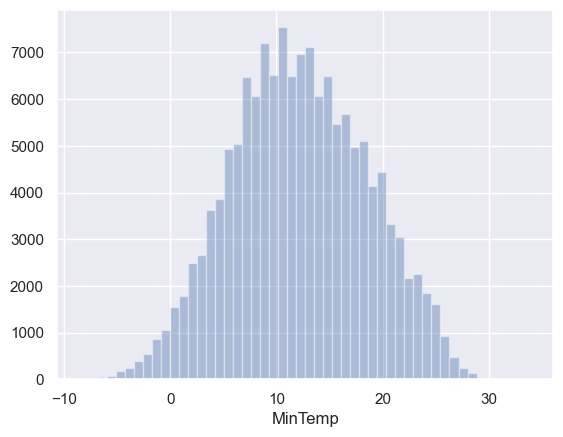

In [21]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False);

Di sini kita dapat melihat bahwa rata-rata suhu minimum di Australia adalah antara 20 dan 23 derajat.

## Scatter Plot


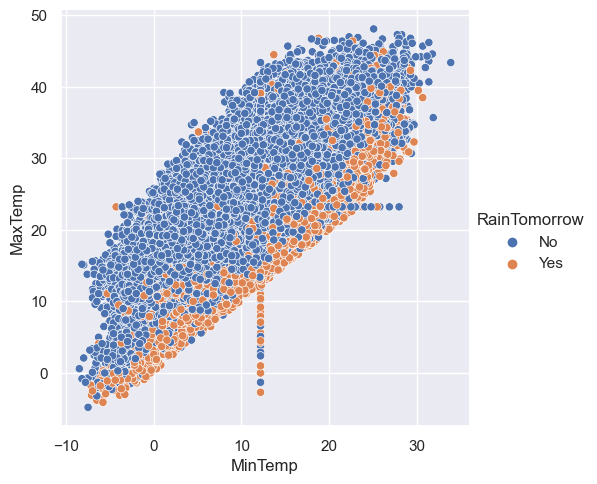

In [22]:
sns.relplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = df);

disini korelasi antar variabel MaxTemp dan MinTemp, dari scatter plot diatas dapat terlihat bahwa ketika memiliki suhu tinggi, lebih umum tidak hujan di hari berikutnya.

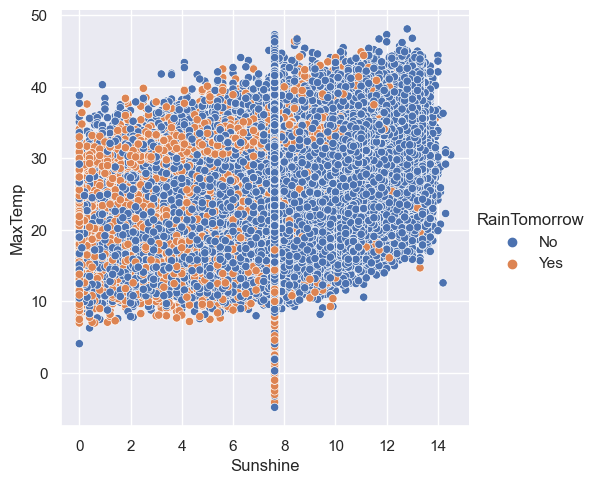

In [23]:
sns.relplot(x='Sunshine', y = 'MaxTemp', hue = "RainTomorrow", data = df);

check korelasi variabel MaxTemp dan Sunshine , disini terdapat bahwa ketika kami memiliki suhu tinggi di Sunshine, lebih umum tidak hujan di hari berikutnya.

# F. Data  Pre-Processing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


In [24]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [25]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Akan dicek korelasi variabel independen agar bisa mengetahui mana variabel yang saling berikatan dengan variabel lainnya yang bisa memengaruhi prediksi.

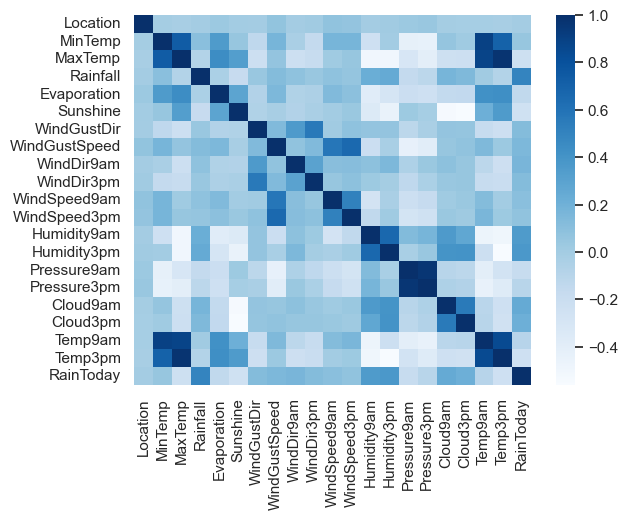

In [26]:
# cek korelasi antar variable independent
matriks_korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues');

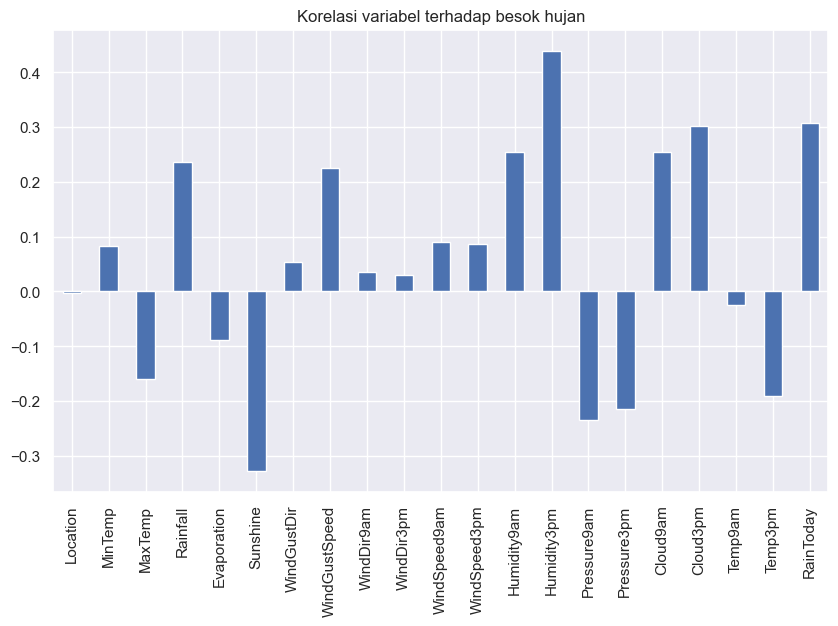

In [27]:
# Membuat correlation bar(mencari korelasi antara variable dependent dengan semua variable independent) plot dan correlation matrix(mencari korelasi antar variable independent)
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corrwith(df.RainTomorrow)
korelasi.plot.bar(title='Korelasi variabel terhadap besok hujan');

**Insight :**

- Banyak data yang berkorelasi negatif dan tinggi secara signifikan maka akan saya take out
- Dari data berikut kita akan menggunakan kolom kolom yang berkorelasi positif saja terhadap keputusan y (RainTommorow)

In [28]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [29]:
df =df[['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday','RainTomorrow']]
df.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,8.000000,4.503167,0,0
1,2,7.4,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,4.437189,4.503167,0,0
2,2,12.9,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,4.437189,2.000000,0,0
3,2,9.2,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,4.437189,4.503167,0,0
4,2,17.5,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0,0


# G. Modelling

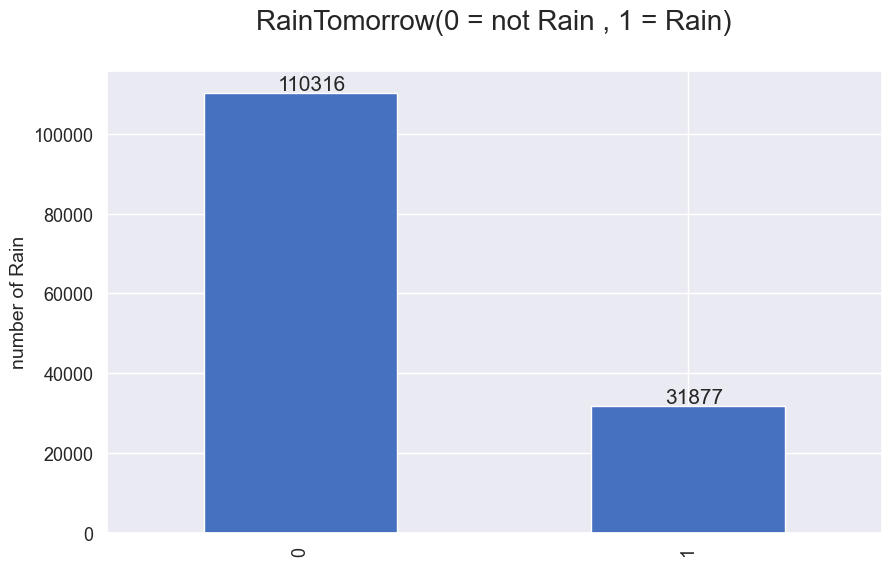

In [30]:
## Check Proporsi variable dependent
# enrolled distribution
ax = df['RainTomorrow'].value_counts().plot(kind='bar', figsize=(10,6), fontsize =13, color='#4671C1')
ax.set_title('RainTomorrow(0 = not Rain , 1 = Rain)', size=20, pad=30)
ax.set_ylabel('number of Rain', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

Dari proporsi data sudah jelas bahwa variable target memiliki ketidak seimbangan proporsi data, hal ini akan berpengaruh terhadap keakuratan prediksi, pada kasus kasus seperti ini seharusnya perlu diberikan perlakuan khusus seperti balancing proporsi menggunakan metode oversample or downsampling variable, tentunya semua itu sudah tersedia pada https://imbalanced-learn.org/ namun pada kasus ini saya tidak melakukan hal tersebut, akan tetapi matrics yang lebih objective pada kasus ini ada pada recall di proporsi rain(1), jika ingin di tuning maka recall di kelas 1 lah yang di tunning.

## Determine X & Y then Splitting train and test data

In [31]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [32]:
X

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,2,13.4,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,8.000000,4.503167,0
1,2,7.4,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,4.437189,4.503167,0
2,2,12.9,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,4.437189,2.000000,0
3,2,9.2,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,4.437189,4.503167,0
4,2,17.5,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,4.437189,4.503167,0
145455,41,2.8,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,4.437189,4.503167,0
145456,41,3.6,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,4.437189,4.503167,0
145457,41,5.4,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,4.437189,4.503167,0


In [33]:
# Splitting with 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10 )

In [34]:
# Menyimpan user lokasi untuk training dan test set
train_id = np.array(X_train['Location'])
test_id = np.array(X_test['Location'])

## Feature Scaling
- Disini kami akan melakukan standarisasi data menggunakan standar scaler
- Mengapa dilakukan scaling, yang pertama karna model yang dipakai yaitu Logistic dan SVM dimana berbeda dengan Treebased model yang tidak perlu dilakukannya scaling/ standarisasi.

In [35]:
#standard scaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

## Logistic Regression

### Define Logistic Regression Model

In [36]:
# Train The model
model_lr = LogisticRegression(solver="liblinear", random_state = 42, penalty = 'l1')
%time model_lr.fit(X_train, y_train)
# Predict model Logistic Regression and summary statistic
%time lr_test_predict = model_lr.predict(X_test)
cm = confusion_matrix(y_test, lr_test_predict)

CPU times: total: 266 ms
Wall time: 391 ms
CPU times: total: 31.2 ms
Wall time: 75.5 ms


### Logistic Regression Evaluation

In [37]:
print(classification_report(y_test, lr_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22137
           1       0.71      0.47      0.57      6302

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



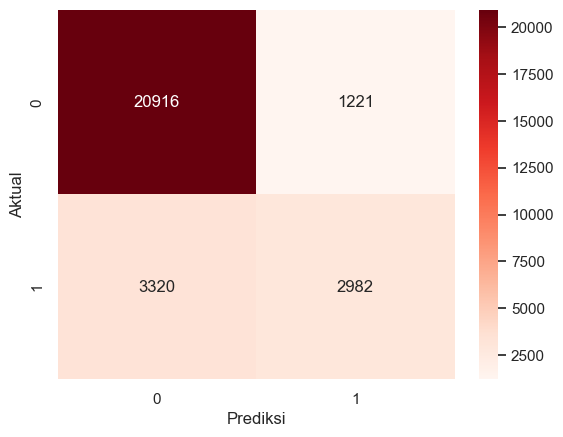

In [38]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

## SVM

### Define SVM Model

In [39]:
# Train The model
model_svc = SVC(kernel='linear', probability=True)
%time model_svc.fit(X_train, y_train)
# Predict model SVC gaussian and summary statistic
%time svc_test_predict = model_svc.predict(X_test)
cm = confusion_matrix(y_test, svc_test_predict)

CPU times: total: 1h 15min 2s
Wall time: 1h 15min 5s
CPU times: total: 29.7 s
Wall time: 29.7 s


### SVM Evaluation

In [40]:
print(classification_report(y_test, svc_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     22137
           1       0.74      0.44      0.55      6302

    accuracy                           0.84     28439
   macro avg       0.80      0.70      0.73     28439
weighted avg       0.83      0.84      0.83     28439



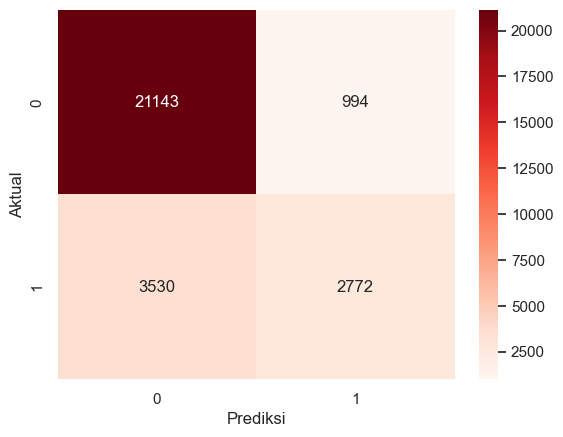

In [41]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

## Plot Kurva ROC 

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)

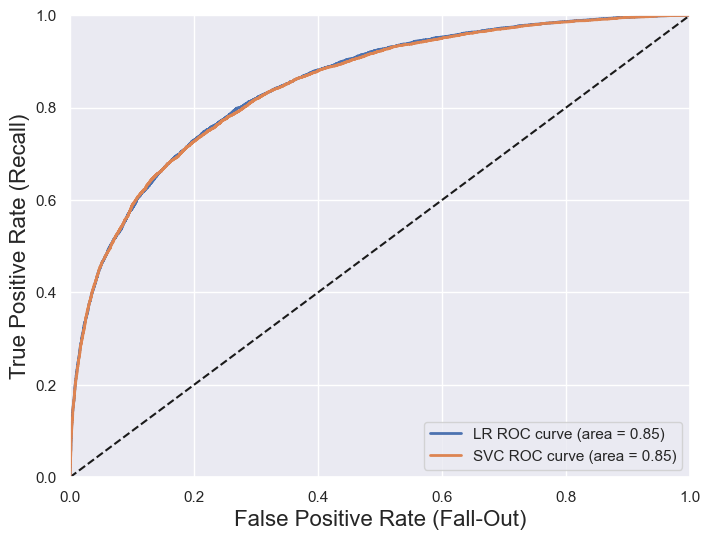

In [43]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                   
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                           
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=["LR",'SVC']
for idx,model in enumerate([model_lr,model_svc]):
    y_scores=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

**Model Analysis based on ROC Curve**

Dari hasil Roc Curve disini dapat disimpulkan bahwa 2 model tersebut baik secara curva nya, bisa dikatakan baik karna jika garis di tiap-tiap model tersebut mendekati nilai 1(y) mendekati recall TP dan mengisi semua area under curve nya.

In [44]:
# Menggabungkan semuanya
y_pred_series = pd.Series(y_test).rename('actual', inplace=True)
hasil_akhir = pd.concat([y_pred_series], axis=1).dropna()
hasil_akhir['predict'] = lr_test_predict
#hasil_akhir.rename(columns={0:'location'}, inplace = True)
hasil_akhir = hasil_akhir[['actual','predict']]

In [45]:
hasil_akhir

,actual,predict
89130,1,1
78393,0,0
29449,1,0
131184,0,1
88217,0,0
...,...,...
55304,0,1
92327,0,0
64121,0,0
57359,0,1


In [46]:
hasil_akhir['different'] = hasil_akhir['actual'] == hasil_akhir['predict'] 
hasil_akhir

,actual,predict,different
89130,1,1,True
78393,0,0,True
29449,1,0,False
131184,0,1,False
88217,0,0,True
...,...,...,...
55304,0,1,False
92327,0,0,True
64121,0,0,True
57359,0,1,False


In [47]:
hasil_akhir.different.unique()

array([ True, False])

# H. Pickle

Kita menggunakan model SVM untuk deployment website ML ini dikarenakan nilai precision untuk menebak besok hujan (target = 1) lebih tinggi yang SVM dibandingkan LogisticRegression. Prediksi turunnya hujan sangatlah penting untuk diketahui karena hujan dapat mengganggu aktivitas seperti penerbangan pesawat dan sebagainya.

In [48]:
pickle.dump(model_lr, open('rain_pred_model.pkl', 'wb'))

# I. Model Inference

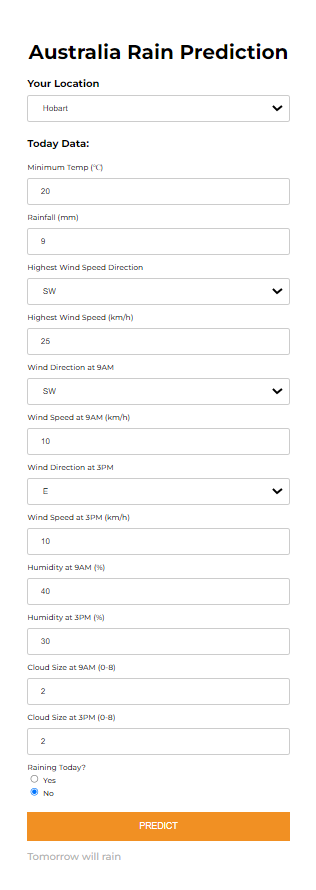

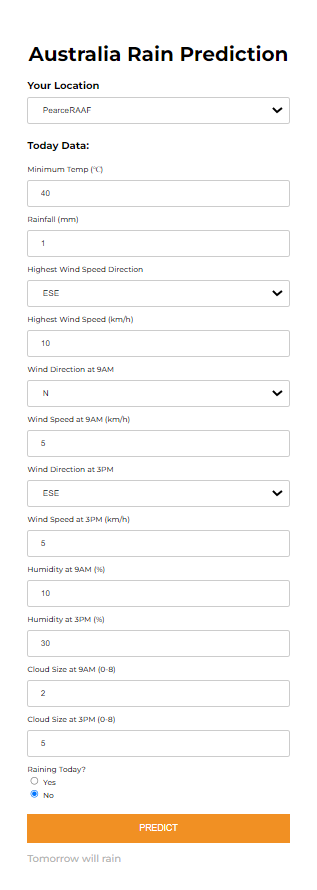

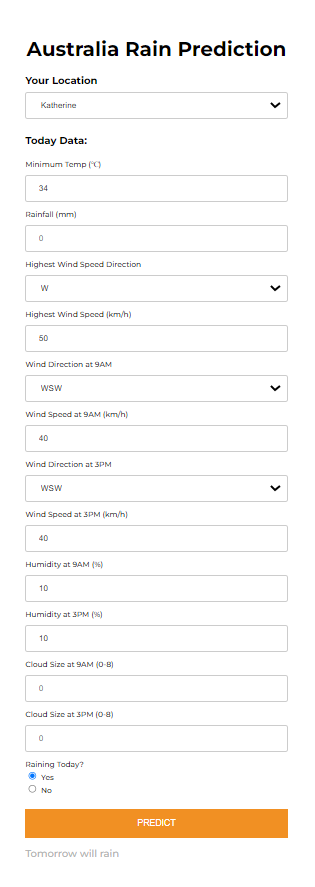

# J. Conclusion

- Dari kedua model tersebut dihasilkan akurasi 84% tetapi untuk precision menebak bahwa besok hujan (target = 1), SVM memiliki nilai precision yang lebih tinggi dibandingkan LogisticRegression
- Fitur - fitur yang dipakai sudah cukup untuk memberikan nilai prediksi yang cukup akurat dan tidak perlu untuk menambah fitur baru ke pemodelan.
